<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 131 (delta 60), reused 39 (delta 11), pack-reused 0
Receiving objects: 100% (131/131), 65.82 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [67]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/



In [ ]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [68]:
!git commit -m "add MLP and related classes"

[main 3899340] add MLP and related classes
 1 file changed, 58 insertions(+)


In [69]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 838 bytes | 838.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   a3891d5..3899340  main -> main


# Housekeeping

In [4]:
!pwd

/content/NaiveNeuralNetwork


In [5]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [37]:
from nnn import Scalar, Neuron
from visualiser import *


# Visualise

In [11]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d/e; f.label='f'
L=(-f).relu(); L.label='L'


In [ ]:
import graphviz
from visualiser import *

In [12]:
L.backward()

[L: 0.16666666666666666, : 0.16666666666666666, : -1, f: -0.16666666666666666, : -0.16666666666666666, d: 1.0, : 4.0, c: 10, e: -6.0, b: -3, a: 2.0]


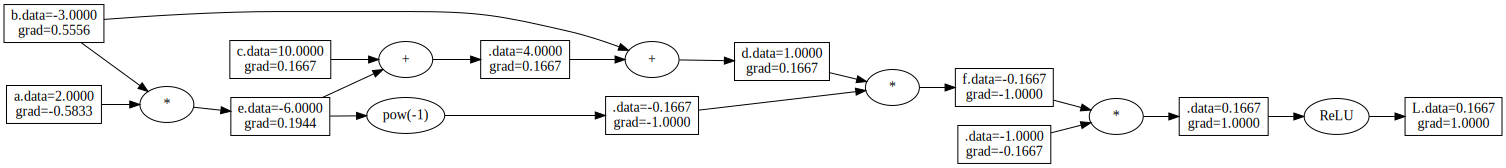

In [13]:
visualise(L)

# Gradient

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

In [16]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [ ]:
f(2.0)

9.0

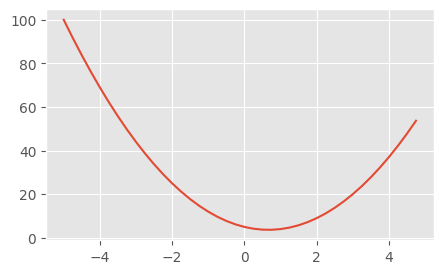

In [24]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

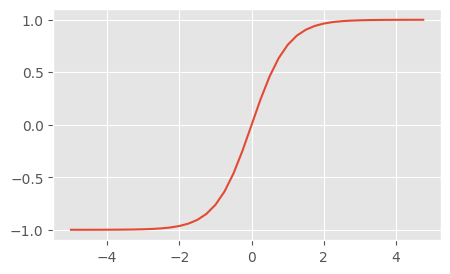

In [27]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [ ]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [10]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411


# Test with linear layer

In [28]:
import torch

In [29]:
x1 = torch.Tensor([2.0]).double().requires_grad_(True)
x2 = torch.Tensor([0.0]).double().requires_grad_(True)
w1 = torch.Tensor([-3.0]).double().requires_grad_(True)
w2 = torch.Tensor([1.0]).double().requires_grad_(True)
b = torch.Tensor([6.8813735870195432]).double().requires_grad_(True)
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [61]:
from nnn import *

In [66]:
X = [0.3, -2.7, 2.5]
mlp = MLP(3, [3,4,6])
mlp(X)


[: -0.5317866042838033,
 : -0.4608296606983998,
 : -0.9811644128901178,
 : -0.806827347969526,
 : 0.9376327862299485,
 : -0.5860131758281335]